In [47]:
from tf_explain.core.grad_cam import GradCAM
import tensorflow as tf

import shutil
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

In [48]:
IMAGE_PATHS = [ './sample-images/dog.jpg', './sample-images/cat.jpg']
shutil.rmtree('temp/gradcam')
os.mkdir('temp/gradcam')

In [49]:
def display_images(paths):
  # Размер фигуры в дюймах (опционально)
  rcParams['figure.figsize'] = 8, 4
  
  # Прочитать изображения
  img_A = mpimg.imread(paths[0])
  img_B = mpimg.imread(paths[-1])
  
  # Отобразить изображения
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(img_A);
  ax[1].imshow(img_B);

In [50]:
tf.config.run_functions_eagerly(True) # для интерактивного режима, выполняет операции сразу без построенного вычислительного графа
# (но уменьшает производительность)

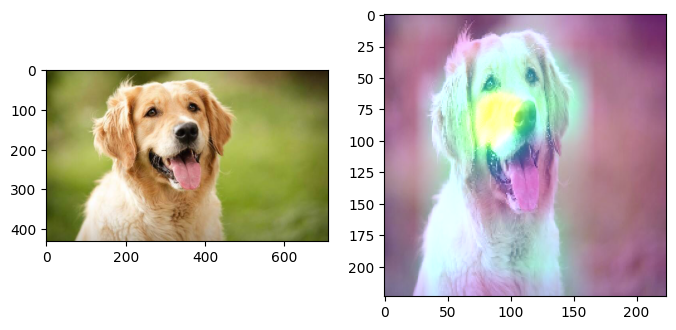

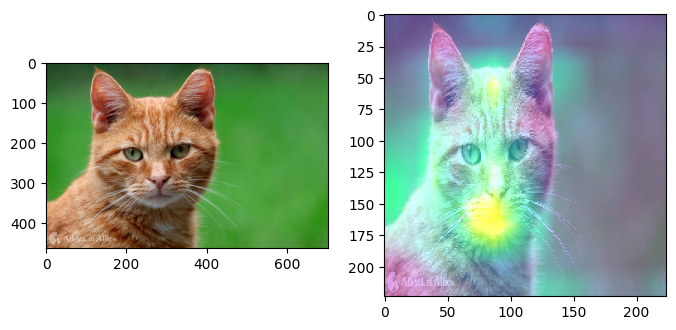

In [51]:
indices = [200, 300]

from IPython.display import Image

for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    index = indices[i]

    img = tf.keras.preprocessing.image.load_img(each_path,
                                                target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    data = ([img], None)
    # Имя для сохранения
    name = each_path.split("/")[-1].split(".jpg")[0]

    explainer = GradCAM()
    model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                              include_top=True)
    grid = explainer.explain(data, model, 'block5_conv3', index)
    
    # Сохранить GradCam визуализацию
    explainer.save(grid, '.', './temp/gradcam/' + name + 'grad_cam.png')

    display_images([each_path, './temp/gradcam/' + name + 'grad_cam.png'])